# Semi Supervised Learning - Semi-Boost Model

This notebook is to perform semi-supervised learning by using the SemiBoost algorithm from the baseline model. The baseline model is developed in `CSI5155 Project - baseline.ipynb`.

## Import Necessary Packages

In [ ]:
import numpy as np;
import os;
import sys;
import joblib;
import random;
from sklearn.model_selection import train_test_split;
from sklearn.ensemble import GradientBoostingClassifier;
import joblib;
import pandas as pd;
import matplotlib.pyplot as plt;
# importing custom modules
sys.path.append("../Assignment 1 - Model Comparison/");
from fileOrganizer import unpack;
from performance import evalAccuracy, evalPrecision, evalRecall, evalF1Score, printConfMtx, plotROC;
import constants;
from model.SemiBoost import build_semi_boost_model, train, predict;

## Load the Data

Original Dataset (without labelling/unlabelling, but normalized)

In [ ]:
mush_X_train_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TRAIN_DIR,
    constants.X_TRAIN_NORMALIZED_FILENAME
));
print("Number of Normalized Samples in Training Set: ", len(mush_X_train_norm));
print("Number of Features in the Normalized Training Set: ", len(mush_X_train_norm[random.randint(0, len(mush_X_train_norm)-1)]));
print("Value range of the original Training Set: ", np.min(mush_X_train_norm), np.max(mush_X_train_norm));

Number of Normalized Samples in Training Set:  1256
Number of Features in the Normalized Training Set:  12
Value range of the original Training Set:  -4.827248760778992 13.457018899436779


In [ ]:
mush_y_train_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TRAIN_DIR,
    constants.Y_TRAIN_NORMALIZED_FILENAME
));
print("Number of Samples in Training Set: ", len(mush_y_train_norm));
print("Unique Labels in Training Set: ", np.unique(mush_y_train_norm));

Number of Samples in Training Set:  1256
Unique Labels in Training Set:  [0 1]


In [ ]:
mush_X_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.X_TEST_NORMALIZED_FILENAME
));
print("Number of Normalized Samples in Testing Set: ", len(mush_X_test_norm));
print("Number of Features in the Normalized Testing Set: ", len(mush_X_test_norm[random.randint(0, len(mush_X_test_norm)-1)]));
print("Value range of the Normalized Testing Set: ", np.min(mush_X_test_norm), np.max(mush_X_test_norm));

Number of Normalized Samples in Testing Set:  629
Number of Features in the Normalized Testing Set:  12
Value range of the Normalized Testing Set:  -4.827248760778992 13.457018899436779


In [ ]:
mush_y_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.Y_TEST_NORMALIZED_FILENAME
));
print("Number of Samples in Testing Set: ", len(mush_y_test_norm));
print("Unique Labels in Testing Set: ", np.unique(mush_y_test_norm));

Number of Samples in Testing Set:  629
Unique Labels in Testing Set:  [0 1]


Labelled Data

In [ ]:
X_train_labelled = unpack(os.path.join(
    constants.TRAIN_DIR,
    constants.X_TRAIN_LABELLED_FILENAME
));
print("Number of Labelled Samples: ", len(X_train_labelled));
print("Number of Features in the Labelled Training Set: ", len(X_train_labelled[random.randint(0, len(X_train_labelled)-1)]));
print("Value range of the Labelled Training Set: ", np.min(X_train_labelled), np.max(X_train_labelled));

Number of Labelled Samples:  251
Number of Features in the Labelled Training Set:  12
Value range of the Labelled Training Set:  -4.827248760778992 3.262658784576777


In [ ]:
y_train_labelled = unpack(os.path.join(
    constants.TRAIN_DIR,
    constants.Y_TRAIN_LABELLED_FILENAME
));
print("Number of Labelled Labels: ", len(y_train_labelled));
print("Unique Labels: ", np.unique(y_train_labelled));

Number of Labelled Labels:  251
Unique Labels:  [0 1]


Unlabelled Data

In [ ]:
X_train_unlabelled = unpack(os.path.join(
    constants.TRAIN_DIR,
    constants.X_TRAIN_UNLABELLED_FILENAME
));
print("Number of Unlabelled Samples: ", len(X_train_unlabelled));
print("Number of Features in the Unlabelled Training Set: ", len(X_train_unlabelled[random.randint(0, len(X_train_unlabelled)-1)]));
print("Value range of the Unlabelled Training Set: ", np.min(X_train_unlabelled), np.max(X_train_unlabelled));

Number of Unlabelled Samples:  1005
Number of Features in the Unlabelled Training Set:  12
Value range of the Unlabelled Training Set:  -4.827248760778992 13.457018899436779


In [ ]:
# This is the true labels for the supposedly unlabelled data
# for debugging purpose!!!
y_train_unlabelled = unpack(os.path.join(
    constants.TRAIN_DIR,
    constants.Y_TRAIN_UNLABELLED_FILENAME
));
print("Number of Unlabelled Labels: ", len(y_train_unlabelled));
print("Unique Labels: ", np.unique(y_train_unlabelled));

Number of Unlabelled Labels:  1005
Unique Labels:  [0 1]


Test Data

In [ ]:
mush_X_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.X_TEST_NORMALIZED_FILENAME
));
print("Number of Normalized Samples in Testing Set: ", len(mush_X_test_norm));
print("Number of Features in the Normalized Testing Set: ", len(mush_X_test_norm[random.randint(0, len(mush_X_test_norm)-1)]));
print("Value range of the Normalized Testing Set: ", np.min(mush_X_test_norm), np.max(mush_X_test_norm));

Number of Normalized Samples in Testing Set:  629
Number of Features in the Normalized Testing Set:  12
Value range of the Normalized Testing Set:  -4.827248760778992 13.457018899436779


In [ ]:
mush_y_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.Y_TEST_NORMALIZED_FILENAME
));
print("Number of Samples in Testing Set: ", len(mush_y_test_norm));
print("Unique Labels in Testing Set: ", np.unique(mush_y_test_norm));

Number of Samples in Testing Set:  629
Unique Labels in Testing Set:  [0 1]


## Load the Column Names

In [ ]:
columns = joblib.load(os.path.join(
    constants.COLUMNS_DIR,
    constants.COLUMNS_FILENAME
));
print("Columns in a sample: ", columns);

Columns in a sample:  ['age' 'gender' 'education' 'country' 'ethnicity' 'nscore' 'escore'
 'oscore' 'ascore' 'cscore' 'impuslive' 'ss']


## SemiBoost Algorithm

### Initialize the SemiBoost Model

In [ ]:
semiBoost = build_semi_boost_model(
    baseModel=GradientBoostingClassifier(random_state=constants.RANDOM_STATE),
);
semiBoost

Model saved to 'models\mushrooms_model_SemiBoost.pkl'


SelfTrainingClassifier(base_estimator=AdaBoostClassifier(base_estimator=GradientBoostingClassifier(random_state=42),
                                                         random_state=42),
                       max_iter=30, threshold=0.8, verbose=True)

In [ ]:
# Save the model
joblib.dump(semiBoost, os.path.join(
    constants.MODEL_DIR,
    constants.MODEL_SEMIBOOST_FILENAME
));

### Train the Ensemble Model

In [ ]:
semiBoost = train(
    X_train=X_train_labelled, 
    y_train=y_train_labelled,
    model=semiBoost
);


Training SemiBoost-like Classifier...


Model saved to 'models\mushrooms_model_SemiBoost.pkl'


c:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


### Generate the Pseudo-Labels for Unlabelled Data from Predictions

In [ ]:
y_pred_unlabelled, y_pred_proba_unlabelled = predict(
    X_test=X_train_unlabelled, 
    y_test=y_train_unlabelled,
    model=semiBoost
);
print("Number of Predictions: ", len(y_pred_unlabelled));
print("Unique Predictions: ", np.unique(y_pred_unlabelled));
print("Number of Probabilities: ", len(y_pred_proba_unlabelled));
print("Value range of the Probabilities: ", np.min(y_pred_proba_unlabelled), ' to ', np.max(y_pred_proba_unlabelled));

Number of Predictions:  1005
Unique Predictions:  [0 1]
Number of Probabilities:  1005
Value range of the Probabilities:  0.0013153611068132784  to  0.9966462296729446


### Train the Model again with pseudo-labels

#### Concatenate Labelled and Unlabelled Data

In [ ]:
X_combined = np.concatenate((X_train_labelled, X_train_unlabelled));
print(f"Number of samples in total: {len(X_combined)}");
print(f"Number of Features in a sample: {len(X_combined[random.randint(0, len(X_combined)-1)])}");

Number of samples in total: 1256
Number of Features in a sample: 12


In [ ]:
y_combined = np.concatenate((y_train_labelled, y_pred_unlabelled));
print(f"Number of labels in total: {len(y_combined)}");
print(f"Unique Labels: {np.unique(y_combined)}");

Number of labels in total: 1256
Unique Labels: [0 1]


#### Re-train the Model

In [ ]:
semiBoost = train(
    X_train=X_combined, 
    y_train=y_combined,
    model=semiBoost
);


Training SemiBoost-like Classifier...


c:\Users\kelvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


Model saved to 'models\mushrooms_model_SemiBoost.pkl'


## Evaluation

### Make Predictions on the Test Set

In [ ]:
y_pred = semiBoost.predict(mush_X_test_norm);
print("Number of Predictions made: ", len(y_pred));
print("Unique Predictions: ", np.unique(y_pred));

Number of Predictions made:  629
Unique Predictions:  [0 1]


### Evaluate the Metrics

In [ ]:
evalArr = y_pred == mush_y_test_norm;
print("Number of correct predictions: ", len(evalArr[evalArr == True]));
print("Number of incorrect predictions: ", len(evalArr[evalArr == False]));

Number of correct predictions:  446
Number of incorrect predictions:  183


In [ ]:
accuracy = evalAccuracy(y_pred, mush_y_test_norm);
precision = evalPrecision(y_pred, mush_y_test_norm);
recall = evalRecall(y_pred, mush_y_test_norm);
f1 = evalF1Score(y_pred, mush_y_test_norm);
print("Accuracy: ", accuracy);
print("Precision: ", precision);
print("Recall: ", recall);
print("F1 Score: ", f1);

Accuracy:  0.7090620031796503
Precision:  0.5976095617529881
Recall:  0.646551724137931
F1 Score:  0.6211180124223603


### Print the Confusion Matrix from the Test Set

In [ ]:
printConfMtx(y_pred, mush_y_test_norm)

Predicted,user,non-user,All
Actual,,,
user,150,82,232
non-user,101,296,397
All,251,378,629


### Display the ROC Curve and its Area Under the Curve (AUC)

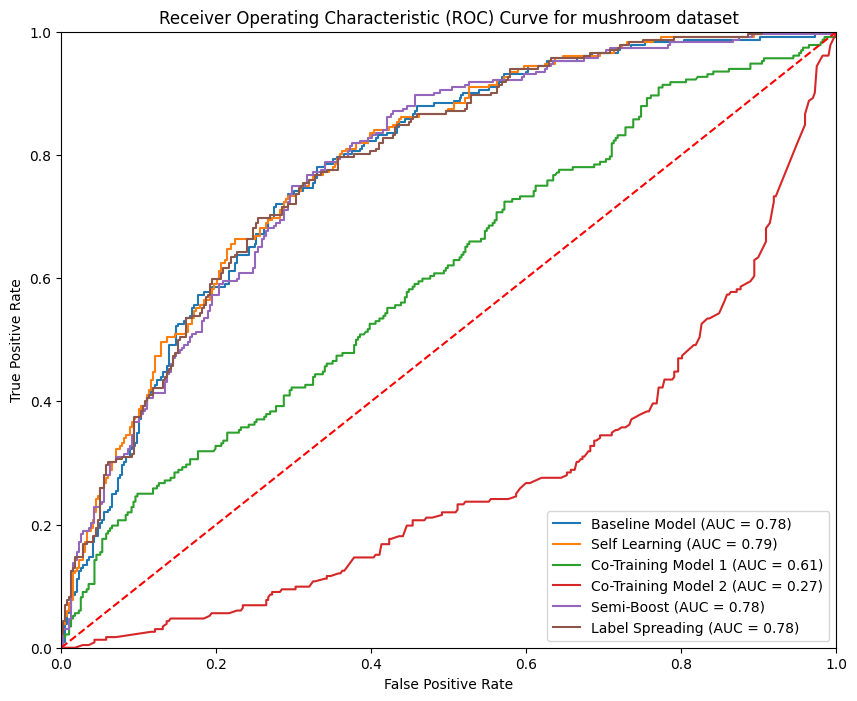

AUC of the baseline model:  0.7813015721358465
AUC of the Self Learning model:  0.7883696690697474
AUC of the 1st Co-Training Model: 0.6050877269173977
AUC of the 2nd Co-Training Model: 0.2735114653000955
AUC of the Semi Boost Model: 0.7826587336054894
AUC of the Label Spreading Model: 0.783386172153218


In [ ]:
features_subsets = joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.CO_TRAINING_BEST_FEATURE_SPLIT_RESULTS_FILENAME
        ));
AUC_baseline, AUC_selftraining, AUC_cotraining1, AUC_cotraining2, AUC_semiboost, AUC_labelspread = plotROC(
    models={
        "Baseline Model": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_FILENAME
        )),
        "Self Learning": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_SELFTRAIN_FILENAME
        )),
        "Co-Training Model 1": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_COTRAIN_1_FILENAME
        )),
        "Co-Training Model 2": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_COTRAIN_2_FILENAME
        )),
        "Semi-Boost": semiBoost,
        "Label Spreading": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_LABELSPREAD_FILENAME
        ))
    },
    X_test=mush_X_test_norm,
    y_test=mush_y_test_norm,
    feature_subsets={
        "Co-Training Model 1": features_subsets["features_view1"],
        "Co-Training Model 2": features_subsets["features_view2"]
    },
    dataset="mushroom"
);
print("AUC of the baseline model: ", AUC_baseline);
print("AUC of the Self Learning model: ", AUC_selftraining);
print(f"AUC of the 1st Co-Training Model: {AUC_cotraining1}");
print(f"AUC of the 2nd Co-Training Model: {AUC_cotraining2}");
print(f"AUC of the Semi Boost Model: {AUC_semiboost}");
print(f"AUC of the Label Spreading Model: {AUC_labelspread}");